In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import pathlib
import cdmetadl.samplers
import cdmetadl.dataset
import torchvision.transforms as transforms
import cdmetadl.helpers.general_helpers
import cdmetadl.dataset

path_to_dataset = "/fastdata/vilab24/meta-album"

dataset_path = pathlib.Path(path_to_dataset)
dataset_info_dict = cdmetadl.helpers.general_helpers.check_datasets(dataset_path, ["SPT"])

dataset = cdmetadl.dataset.ImageDataset("Sports", dataset_info_dict["SPT"])

to_pil_image = transforms.ToPILImage()

n_way_sampler = cdmetadl.samplers.ValueSampler(value=5)
k_shot_sampler = cdmetadl.samplers.ValueSampler(value=4)

task: cdmetadl.dataset.Task = dataset.generate_task(n_way_sampler, k_shot_sampler, query_size=4)


In [36]:
frisbees =  []

for image, label in zip(task.support_set.images, task.support_set.labels):
    
    if task.support_set.class_names[int(label)] == "frisbee":
        frisbees.append(image)

In [57]:
frisbees[0].permute(1, 2, 0)

torch.Size([128, 128, 3])

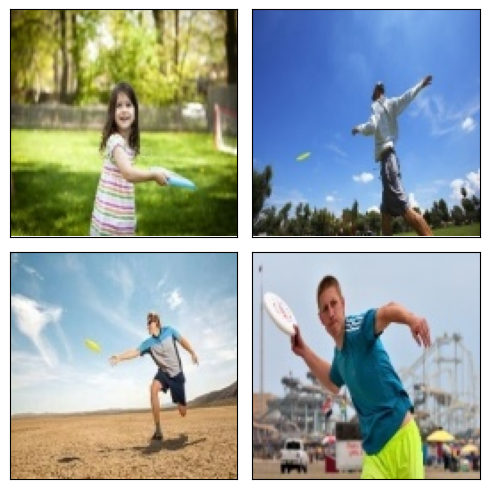

In [79]:
import matplotlib.pyplot as plt


# Plotting
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

axs[0, 0].imshow(frisbees[0].permute(1, 2, 0))
axs[0, 1].imshow(frisbees[1].permute(1, 2, 0))
axs[1, 0].imshow(frisbees[2].permute(1, 2, 0))
axs[1, 1].imshow(frisbees[3].permute(1, 2, 0))

# Add title

spacing = 100
total_width = (128 + spacing) * 3 - spacing
total_height = (128 + spacing) * 2  - spacing
    

# Remove axis values
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])


# Adjust layout
plt.subplots_adjust(wspace=1, hspace=1)
plt.tight_layout()
plt.show()


Support Set
tensor(0)
weightlifting


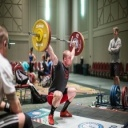

tensor(0)
weightlifting


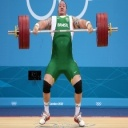

tensor(0)
weightlifting


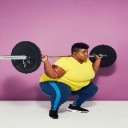

tensor(0)
weightlifting


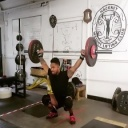

tensor(1)
pommel horse


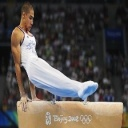

tensor(1)
pommel horse


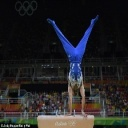

tensor(1)
pommel horse


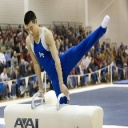

tensor(1)
pommel horse


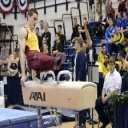

tensor(2)
frisbee


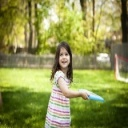

tensor(2)
frisbee


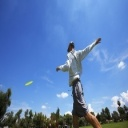

tensor(2)
frisbee


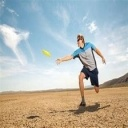

tensor(2)
frisbee


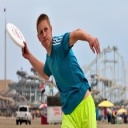

tensor(3)
basketball


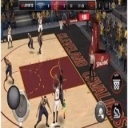

tensor(3)
basketball


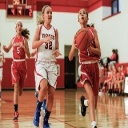

tensor(3)
basketball


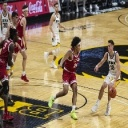

tensor(3)
basketball


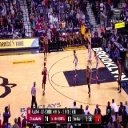

tensor(4)
rowing


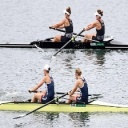

tensor(4)
rowing


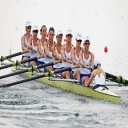

tensor(4)
rowing


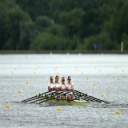

tensor(4)
rowing


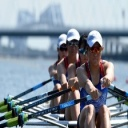

Query Set
tensor(0)
weightlifting


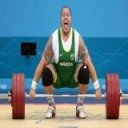

tensor(0)
weightlifting


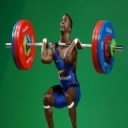

tensor(0)
weightlifting


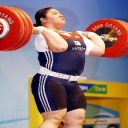

tensor(0)
weightlifting


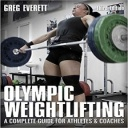

tensor(1)
pommel horse


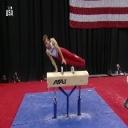

tensor(1)
pommel horse


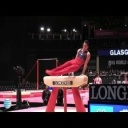

tensor(1)
pommel horse


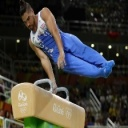

tensor(1)
pommel horse


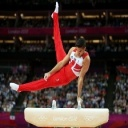

tensor(2)
frisbee


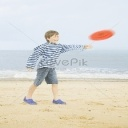

tensor(2)
frisbee


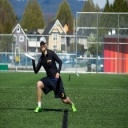

tensor(2)
frisbee


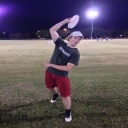

tensor(2)
frisbee


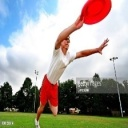

tensor(3)
basketball


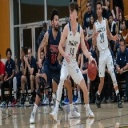

tensor(3)
basketball


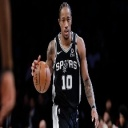

tensor(3)
basketball


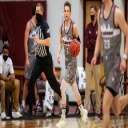

tensor(3)
basketball


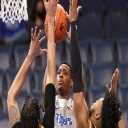

tensor(4)
rowing


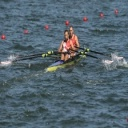

tensor(4)
rowing


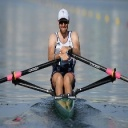

tensor(4)
rowing


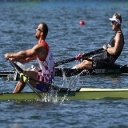

tensor(4)
rowing


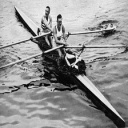

In [32]:

print("Support Set")
for image, label in zip(task.support_set.images, task.support_set.labels):
    print(label)
    print(task.support_set.class_names[int(label)])
    display(to_pil_image(image))


print("Query Set")
for image, label in zip(task.query_set.images, task.query_set.labels):
    print(label)
    print(task.query_set.class_names[int(label)])
    display(to_pil_image(image))

tensor(64)
basketball


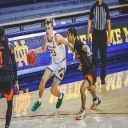

tensor(4)
fencing


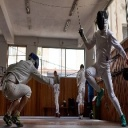

tensor(51)
arm wrestling


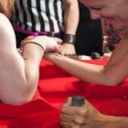

tensor(11)
tennis


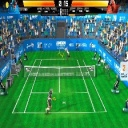

tensor(54)
rock climbing


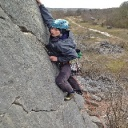

{'archery': 0, 'snow boarding': 1, 'hammer throw': 2, 'air hockey': 3, 'fencing': 4, 'table tennis': 5, 'shot put': 6, 'sailboat racing': 7, 'wheelchair racing': 8, 'speed skating': 9, 'rings': 10, 'tennis': 11, 'surfing': 12, 'snowmobile racing': 13, 'bowling': 14, 'formula 1 racing': 15, 'croquet': 16, 'lacrosse': 17, 'polo': 18, 'canoe slamon': 19, 'track bicycle': 20, 'horse racing': 21, 'swimming': 22, 'curling': 23, 'sumo wrestling': 24, 'horse jumping': 25, 'pommel horse': 26, 'figure skating men': 27, 'golf': 28, 'olympic wrestling': 29, 'rowing': 30, 'uneven bars': 31, 'hurdles': 32, 'harness racing': 33, 'baseball': 34, 'cricket': 35, 'javelin': 36, 'billiards': 37, 'giant slalom': 38, 'ice climbing': 39, 'jai alai': 40, 'figure skating pairs': 41, 'volleyball': 42, 'barell racing': 43, 'bull riding': 44, 'weightlifting': 45, 'rollerblade racing': 46, 'figure skating women': 47, 'boxing': 48, 'high jump': 49, 'balance beam': 50, 'arm wrestling': 51, 'tug of war': 52, 'paralle

In [25]:
import numpy as np

for idx in [0, 100, 42, 89, 285]:
    image, label = dataset[idx]
    print(label)
    print(dataset.numerical_label_to_text[int(label)])
    display(to_pil_image(image))

print(dataset.text_to_numerical_label)
print(dataset.numerical_label_to_text)

In [58]:
datasets_info = cdmetadl.helpers.general_helpers.check_datasets(dataset_path, ["SPT", "CRS", "APL", "BTS", "AWA"])
meta_dataset = cdmetadl.dataset.MetaImageDataset([
    cdmetadl.dataset.ImageDataset(name, info) for name, info in datasets_info.items()
])
print(meta_dataset.dataset_end_index)

# for idx in [0, 10759, 10760, 11599, 11600, 12639]:
#     image, label = meta_dataset[idx]
#     print(label)
#     # print(dataset.numerical_label_to_text[int(label)])
#     display(to_pil_image(image))

for task in meta_dataset.generate_tasks_for_each_dataset(3, n_way_sampler, k_shot_sampler, 4):
    print(task.dataset_name)

[2920, 10760, 11600, 12640, 14640]
SPT
SPT
SPT
CRS
CRS
CRS
APL
APL
APL
BTS
BTS
BTS
AWA
AWA
AWA


In [59]:
import cdmetadl.dataset

meta_dataset_train, meta_dataset_test = cdmetadl.dataset.split_by_names(meta_dataset, [["CRS", "BTS", "APL"], ["AWA", "SPT"]])
print("Train")
for task in meta_dataset_train.generate_tasks_for_each_dataset(3, n_way_sampler, k_shot_sampler, 4):
    print(task.dataset_name)

print("Test")
for task in meta_dataset_test.generate_tasks_for_each_dataset(3, n_way_sampler, k_shot_sampler, 4):
    print(task.dataset_name)

Train
CRS
CRS
CRS
APL
APL
APL
BTS
BTS
BTS
Test
SPT
SPT
SPT
AWA
AWA
AWA


Support Set
tensor(0)
field hockey


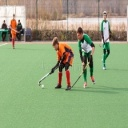

tensor(0)
field hockey


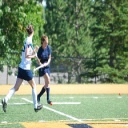

tensor(0)
field hockey


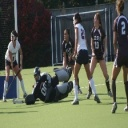

tensor(0)
field hockey


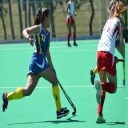

tensor(1)
balance beam


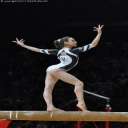

tensor(1)
balance beam


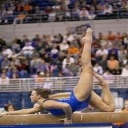

tensor(1)
balance beam


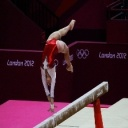

tensor(1)
balance beam


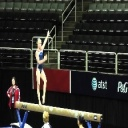

tensor(2)
barell racing


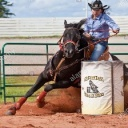

tensor(2)
barell racing


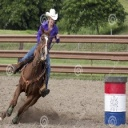

tensor(2)
barell racing


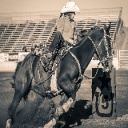

tensor(2)
barell racing


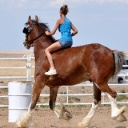

tensor(3)
bull riding


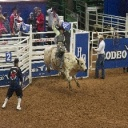

tensor(3)
bull riding


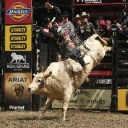

tensor(3)
bull riding


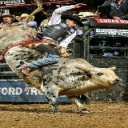

tensor(3)
bull riding


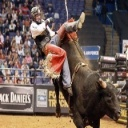

tensor(4)
formula 1 racing


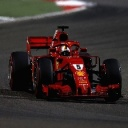

tensor(4)
formula 1 racing


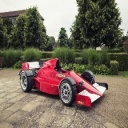

tensor(4)
formula 1 racing


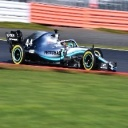

tensor(4)
formula 1 racing


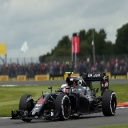

Query Set
tensor(0)
field hockey


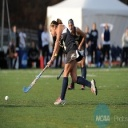

tensor(0)
field hockey


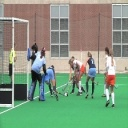

tensor(0)
field hockey


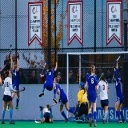

tensor(0)
field hockey


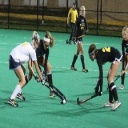

tensor(1)
balance beam


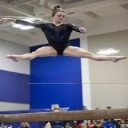

tensor(1)
balance beam


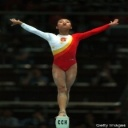

tensor(1)
balance beam


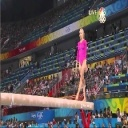

tensor(1)
balance beam


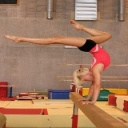

tensor(2)
barell racing


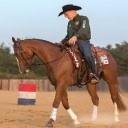

tensor(2)
barell racing


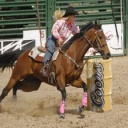

tensor(2)
barell racing


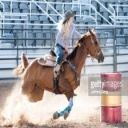

tensor(2)
barell racing


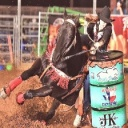

tensor(3)
bull riding


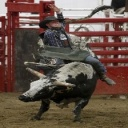

tensor(3)
bull riding


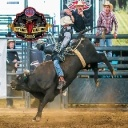

tensor(3)
bull riding


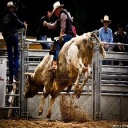

tensor(3)
bull riding


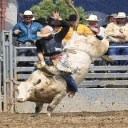

tensor(4)
formula 1 racing


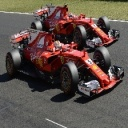

tensor(4)
formula 1 racing


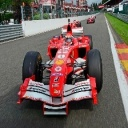

tensor(4)
formula 1 racing


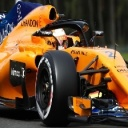

tensor(4)
formula 1 racing


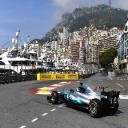

In [101]:
wd_datasets_info = cdmetadl.helpers.general_helpers.check_datasets(dataset_path, ["SPT"])
wd_meta_dataset = cdmetadl.dataset.MetaImageDataset([
    cdmetadl.dataset.ImageDataset(name, info) for name, info in wd_datasets_info.items()
])
meta_dataset_train, meta_dataset_val, meta_dataset_test = cdmetadl.dataset.random_class_split(wd_meta_dataset, lengths=[0.5, 0.25, 0.25], seed=42)

task: cdmetadl.dataset.Task = meta_dataset_val.datasets[0].generate_task(n_way_sampler, k_shot_sampler, query_size=4)
print("Support Set")
for image, label in zip(task.support_set.images, task.support_set.labels):
    print(label)
    print(task.support_set.class_names[int(label)])
    display(to_pil_image(image))

print("Query Set")
for image, label in zip(task.query_set.images, task.query_set.labels):
    print(label)
    print(task.query_set.class_names[int(label)])
    display(to_pil_image(image))